In [ ]:
#importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [ ]:
#train file
df1= pd.read_csv('/content/train.csv')
df1.head()

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,5/22/2023,57mm,freezers available,outstation,outlet_code_3254,95
1,5/29/2023,8mm,freezers available,outstation,outlet_code_1859,107
2,5/8/2023,170.57mm,freezers available,outstation,outlet_code_4176,83
3,5/22/2023,37mm,freezers available,outstation,outlet_code_1459,106
4,3/27/2023,7mm,freezers available,outstation,outlet_code_38,43


In [ ]:
unique_classes_count = df1['freezer_status'].nunique()

In [ ]:
df1['week_start_date'] = pd.to_datetime(df1['week_start_date'])
df1['day_of_week'] = df1['week_start_date'].dt.dayofweek
df1['month'] = df1['week_start_date'].dt.month
df1['quarter'] = df1['week_start_date'].dt.quarter
df1['year'] = df1['week_start_date'].dt.year

In [ ]:
unique_classes = df1['outlet_region'].unique()

print("Unique classes in 'column_name':")
print(unique_classes)

Unique classes in 'column_name':
['outstation' 'upcountry' 'western']


In [ ]:
# Assuming your DataFrame is named df
# Check for null values in the entire DataFrame
null_values = df1.isnull().sum()

# Print or display the null values
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
week_start_date      0
expected_rainfall    0
freezer_status       0
outlet_region        0
outlet_code          0
sales_quantity       0
day_of_week          0
month                0
quarter              0
year                 0
dtype: int64


In [ ]:
# Observations
# Identify outliers
outliers = df1[df1['sales_quantity'] > df1['sales_quantity'].mean() + 3 * df1['sales_quantity'].std()]

print("\nOutliers:",outliers.shape)



Outliers: (2076, 10)


In [ ]:
# Drop rows containing outliers
df1 = df1.drop(outliers.index)

# Display information about the cleaned DataFrame
print("\nDataFrame after dropping outliers:")
print(df1.info())


DataFrame after dropping outliers:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111324 entries, 0 to 113399
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   week_start_date    111324 non-null  datetime64[ns]
 1   expected_rainfall  111324 non-null  object        
 2   freezer_status     111324 non-null  object        
 3   outlet_region      111324 non-null  object        
 4   outlet_code        111324 non-null  object        
 5   sales_quantity     111324 non-null  int64         
 6   day_of_week        111324 non-null  int64         
 7   month              111324 non-null  int64         
 8   quarter            111324 non-null  int64         
 9   year               111324 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 9.3+ MB
None


In [ ]:
df_encoded = pd.get_dummies(df1, columns=['outlet_region'], prefix='outlet_region')

# Print or display the DataFrame with the one-hot encoded 'station' column
print("DataFrame with One-Hot Encoded 'station' column:")
print(df_encoded)

DataFrame with One-Hot Encoded 'station' column:
       week_start_date expected_rainfall         freezer_status  \
0           2023-05-22              57mm    freezers available    
1           2023-05-29               8mm    freezers available    
2           2023-05-08          170.57mm    freezers available    
3           2023-05-22              37mm    freezers available    
4           2023-03-27               7mm    freezers available    
...                ...               ...                    ...   
113395      2023-04-24              61mm    freezers available    
113396      2023-02-20              10mm    freezers available    
113397      2023-06-05           98.28mm    freezers available    
113398      2023-06-05          120.46mm    freezers available    
113399      2023-05-01              48mm    freezers available    

             outlet_code  sales_quantity  day_of_week  month  quarter  year  \
0       outlet_code_3254              95            0      5       

In [ ]:
df_encoded.head(50)

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,2023-05-22,57mm,freezers available,outlet_code_3254,95,0,5,2,2023,1,0,0
1,2023-05-29,8mm,freezers available,outlet_code_1859,107,0,5,2,2023,1,0,0
2,2023-05-08,170.57mm,freezers available,outlet_code_4176,83,0,5,2,2023,1,0,0
3,2023-05-22,37mm,freezers available,outlet_code_1459,106,0,5,2,2023,1,0,0
4,2023-03-27,7mm,freezers available,outlet_code_38,43,0,3,1,2023,1,0,0
5,2023-04-10,0mm,freezers available,outlet_code_2006,56,0,4,2,2023,1,0,0
6,2023-03-20,143.31mm,freezers available,outlet_code_3795,56,0,3,1,2023,1,0,0
7,2023-03-20,138.99mm,freezers available,outlet_code_2892,53,0,3,1,2023,1,0,0
8,2023-01-02,14mm,freezers available,outlet_code_1738,59,0,1,1,2023,1,0,0
9,2023-04-03,33mm,freezers available,outlet_code_2189,41,0,4,2,2023,1,0,0


In [ ]:
df=df_encoded
df['outlet_code'] = df['outlet_code'].str.extract(r'(\d+)')

# Convert the extracted part to numeric (optional, depending on your needs)
df['outlet_code'] = pd.to_numeric(df['outlet_code'])

# Print or display the updated DataFrame
print("DataFrame with Extracted Outlet Codes:")
df.head(50)

DataFrame with Extracted Outlet Codes:


,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,2023-05-22,57mm,freezers available,3254,95,0,5,2,2023,1,0,0
1,2023-05-29,8mm,freezers available,1859,107,0,5,2,2023,1,0,0
2,2023-05-08,170.57mm,freezers available,4176,83,0,5,2,2023,1,0,0
3,2023-05-22,37mm,freezers available,1459,106,0,5,2,2023,1,0,0
4,2023-03-27,7mm,freezers available,38,43,0,3,1,2023,1,0,0
5,2023-04-10,0mm,freezers available,2006,56,0,4,2,2023,1,0,0
6,2023-03-20,143.31mm,freezers available,3795,56,0,3,1,2023,1,0,0
7,2023-03-20,138.99mm,freezers available,2892,53,0,3,1,2023,1,0,0
8,2023-01-02,14mm,freezers available,1738,59,0,1,1,2023,1,0,0
9,2023-04-03,33mm,freezers available,2189,41,0,4,2,2023,1,0,0


#### Merging all data frames into one df

In [ ]:
df['expected_rainfall'] = df['expected_rainfall'].str.extract('(\d+)')

# Convert the extracted part to numeric (optional, depending on your needs)
df['expected_rainfall'] = pd.to_numeric(df['expected_rainfall'])

# Print or display the updated DataFrame
print("DataFrame with Extracted Integer Values for Expected Rainfall:")
df.head()

DataFrame with Extracted Integer Values for Expected Rainfall:


,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,2023-05-22,57,freezers available,3254,95,0,5,2,2023,1,0,0
1,2023-05-29,8,freezers available,1859,107,0,5,2,2023,1,0,0
2,2023-05-08,170,freezers available,4176,83,0,5,2,2023,1,0,0
3,2023-05-22,37,freezers available,1459,106,0,5,2,2023,1,0,0
4,2023-03-27,7,freezers available,38,43,0,3,1,2023,1,0,0


In [ ]:
df_encoded.head(50)

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,2023-05-22,57,freezers available,3254,95,0,5,2,2023,1,0,0
1,2023-05-29,8,freezers available,1859,107,0,5,2,2023,1,0,0
2,2023-05-08,170,freezers available,4176,83,0,5,2,2023,1,0,0
3,2023-05-22,37,freezers available,1459,106,0,5,2,2023,1,0,0
4,2023-03-27,7,freezers available,38,43,0,3,1,2023,1,0,0
5,2023-04-10,0,freezers available,2006,56,0,4,2,2023,1,0,0
6,2023-03-20,143,freezers available,3795,56,0,3,1,2023,1,0,0
7,2023-03-20,138,freezers available,2892,53,0,3,1,2023,1,0,0
8,2023-01-02,14,freezers available,1738,59,0,1,1,2023,1,0,0
9,2023-04-03,33,freezers available,2189,41,0,4,2,2023,1,0,0


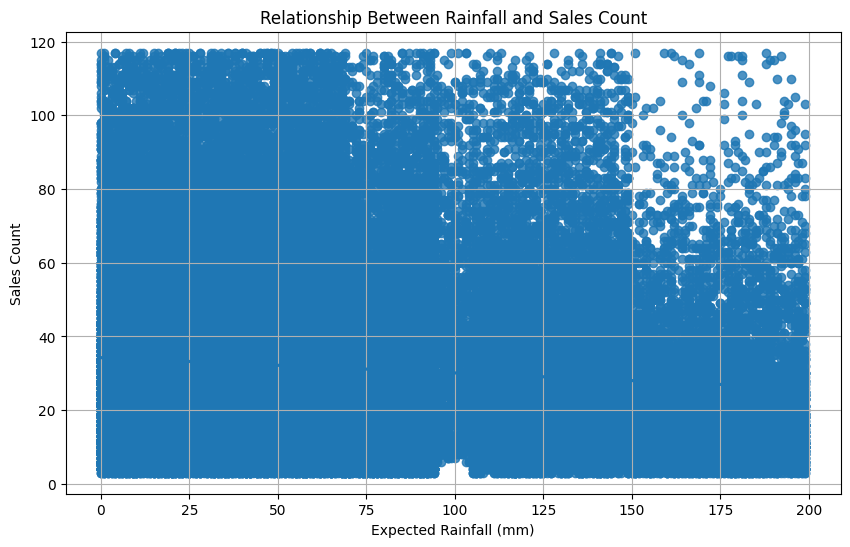

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='expected_rainfall', y='sales_quantity', data=df)
plt.title('Relationship Between Rainfall and Sales Count')
plt.xlabel('Expected Rainfall (mm)')
plt.ylabel('Sales Count')
plt.grid(True)
plt.show()

Average Sales Count by Rainfall Range:
rainfall_range
0-70       32.910873
70-150     30.668319
150-200    23.671176
200+             NaN
Name: sales_quantity, dtype: float64


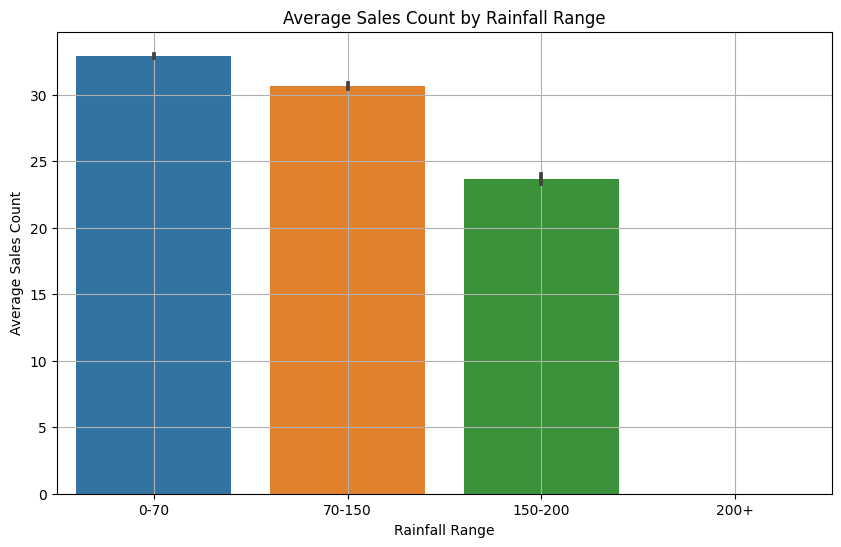

In [ ]:
df=df_encoded
# Define rainfall bins
bins = [0, 70, 150, 200, float('inf')]  # Adjust the bin edges as needed
labels = ['0-70', '70-150', '150-200', '200+']

# Create a new column 'rainfall_range' with the corresponding labels
df['rainfall_range'] = pd.cut(df['expected_rainfall'], bins=bins, labels=labels, right=False)

# Print average sales count for each rainfall range
average_sales_by_range = df.groupby('rainfall_range')['sales_quantity'].mean()
print("Average Sales Count by Rainfall Range:")
print(average_sales_by_range)

# Plot a bar chart to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='rainfall_range', y='sales_quantity', data=df, order=labels)
plt.title('Average Sales Count by Rainfall Range')
plt.xlabel('Rainfall Range')
plt.ylabel('Average Sales Count')
plt.grid(True)
plt.show()

In [ ]:
df.head(50)

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range
0,2023-05-22,57,freezers available,3254,95,0,5,2,2023,1,0,0,0-70
1,2023-05-29,8,freezers available,1859,107,0,5,2,2023,1,0,0,0-70
2,2023-05-08,170,freezers available,4176,83,0,5,2,2023,1,0,0,150-200
3,2023-05-22,37,freezers available,1459,106,0,5,2,2023,1,0,0,0-70
4,2023-03-27,7,freezers available,38,43,0,3,1,2023,1,0,0,0-70
5,2023-04-10,0,freezers available,2006,56,0,4,2,2023,1,0,0,0-70
6,2023-03-20,143,freezers available,3795,56,0,3,1,2023,1,0,0,70-150
7,2023-03-20,138,freezers available,2892,53,0,3,1,2023,1,0,0,70-150
8,2023-01-02,14,freezers available,1738,59,0,1,1,2023,1,0,0,0-70
9,2023-04-03,33,freezers available,2189,41,0,4,2,2023,1,0,0,0-70


In [ ]:
# Assuming df is your DataFrame and 'column_name' is the column containing classes
df1['freezer_status'] = df1['freezer_status'].replace({' no freezers available ': 0, '  freezers available ': 1,' freezers available ': 1,'   freezers available ':1})

# If there are leading/trailing whitespaces in the classes, you can use the following instead:
# df['column_name'] = df['column_name'].str.strip().replace({'no freezers available': '0', 'freezers available': '1'})

print("Updated DataFrame:")
df1.head(20)

Updated DataFrame:


,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity,day_of_week,month,quarter,year
0,2023-05-22,57mm,1,outstation,outlet_code_3254,95,0,5,2,2023
1,2023-05-29,8mm,1,outstation,outlet_code_1859,107,0,5,2,2023
2,2023-05-08,170.57mm,1,outstation,outlet_code_4176,83,0,5,2,2023
3,2023-05-22,37mm,1,outstation,outlet_code_1459,106,0,5,2,2023
4,2023-03-27,7mm,1,outstation,outlet_code_38,43,0,3,1,2023
5,2023-04-10,0mm,1,outstation,outlet_code_2006,56,0,4,2,2023
6,2023-03-20,143.31mm,1,outstation,outlet_code_3795,56,0,3,1,2023
7,2023-03-20,138.99mm,1,outstation,outlet_code_2892,53,0,3,1,2023
8,2023-01-02,14mm,1,outstation,outlet_code_1738,59,0,1,1,2023
9,2023-04-03,33mm,1,outstation,outlet_code_2189,41,0,4,2,2023


In [ ]:
df.head()

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range
0,2023-05-22,57,freezers available,3254,95,0,5,2,2023,1,0,0,0-70
1,2023-05-29,8,freezers available,1859,107,0,5,2,2023,1,0,0,0-70
2,2023-05-08,170,freezers available,4176,83,0,5,2,2023,1,0,0,150-200
3,2023-05-22,37,freezers available,1459,106,0,5,2,2023,1,0,0,0-70
4,2023-03-27,7,freezers available,38,43,0,3,1,2023,1,0,0,0-70


In [ ]:
df.value_counts('year')

year
2023    111324
dtype: int64

In [ ]:
df.value_counts('day_of_week')

day_of_week
0    111324
dtype: int64

In [ ]:
df_new = df.drop(columns=['year', 'day_of_week', 'week_start_date'])

In [ ]:
df_new.head(20)

,expected_rainfall,freezer_status,outlet_code,sales_quantity,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range
0,57,freezers available,3254,95,5,2,1,0,0,0-70
1,8,freezers available,1859,107,5,2,1,0,0,0-70
2,170,freezers available,4176,83,5,2,1,0,0,150-200
3,37,freezers available,1459,106,5,2,1,0,0,0-70
4,7,freezers available,38,43,3,1,1,0,0,0-70
5,0,freezers available,2006,56,4,2,1,0,0,0-70
6,143,freezers available,3795,56,3,1,1,0,0,70-150
7,138,freezers available,2892,53,3,1,1,0,0,70-150
8,14,freezers available,1738,59,1,1,1,0,0,0-70
9,33,freezers available,2189,41,4,2,1,0,0,0-70


In [ ]:
df_new.value_counts('freezer_status')

freezer_status
 freezers available        71640
 no freezers available     27405
  freezers available        7459
   freezers available       4820
dtype: int64

In [ ]:
df_new.value_counts('rainfall_range')

rainfall_range
0-70       71808
70-150     30867
150-200     8649
200+           0
dtype: int64

In [ ]:
df_new['freezer_status'] = df_new['freezer_status'].replace({' no freezers available ': 0, '  freezers available ': 1,' freezers available ': 1,'   freezers available ':1})

In [ ]:
df_new.head(20)

,expected_rainfall,freezer_status,outlet_code,sales_quantity,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range
0,57,1,3254,95,5,2,1,0,0,0-70
1,8,1,1859,107,5,2,1,0,0,0-70
2,170,1,4176,83,5,2,1,0,0,150-200
3,37,1,1459,106,5,2,1,0,0,0-70
4,7,1,38,43,3,1,1,0,0,0-70
5,0,1,2006,56,4,2,1,0,0,0-70
6,143,1,3795,56,3,1,1,0,0,70-150
7,138,1,2892,53,3,1,1,0,0,70-150
8,14,1,1738,59,1,1,1,0,0,0-70
9,33,1,2189,41,4,2,1,0,0,0-70


In [ ]:
df_new.value_counts('freezer_status')

freezer_status
1    83919
0    27405
dtype: int64

In [ ]:
df_new_encoded = pd.get_dummies(df_new, columns=['rainfall_range'], prefix='rainfall')

In [ ]:
df_new_encoded.head(20)

,expected_rainfall,freezer_status,outlet_code,sales_quantity,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_0-70,rainfall_70-150,rainfall_150-200,rainfall_200+
0,57,1,3254,95,5,2,1,0,0,1,0,0,0
1,8,1,1859,107,5,2,1,0,0,1,0,0,0
2,170,1,4176,83,5,2,1,0,0,0,0,1,0
3,37,1,1459,106,5,2,1,0,0,1,0,0,0
4,7,1,38,43,3,1,1,0,0,1,0,0,0
5,0,1,2006,56,4,2,1,0,0,1,0,0,0
6,143,1,3795,56,3,1,1,0,0,0,1,0,0
7,138,1,2892,53,3,1,1,0,0,0,1,0,0
8,14,1,1738,59,1,1,1,0,0,1,0,0,0
9,33,1,2189,41,4,2,1,0,0,1,0,0,0


In [ ]:
df_new_encoded.drop(columns=['rainfall_200+'], inplace=True)

In [ ]:
df_new_encoded

,expected_rainfall,freezer_status,outlet_code,sales_quantity,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_0-70,rainfall_70-150,rainfall_150-200
0,57,1,3254,95,5,2,1,0,0,1,0,0
1,8,1,1859,107,5,2,1,0,0,1,0,0
2,170,1,4176,83,5,2,1,0,0,0,0,1
3,37,1,1459,106,5,2,1,0,0,1,0,0
4,7,1,38,43,3,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
113395,61,1,2946,27,4,2,0,0,1,1,0,0
113396,10,1,3671,36,2,1,0,0,1,1,0,0
113397,98,1,3671,76,6,2,0,0,1,0,1,0
113398,120,1,2618,76,6,2,0,0,1,0,1,0


In [ ]:
X = df_new_encoded.copy()

In [ ]:
y = df1['sales_quantity']

In [ ]:
X.shape

(111324, 12)

In [ ]:
y.shape

(111324,)

In [ ]:
df_train = df_new_encoded.copy()

In [ ]:
df_train['sales_quantity'] = y

In [ ]:
df_train.head(20)

,expected_rainfall,freezer_status,outlet_code,sales_quantity,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_0-70,rainfall_70-150,rainfall_150-200
0,57,1,3254,95,5,2,1,0,0,1,0,0
1,8,1,1859,107,5,2,1,0,0,1,0,0
2,170,1,4176,83,5,2,1,0,0,0,0,1
3,37,1,1459,106,5,2,1,0,0,1,0,0
4,7,1,38,43,3,1,1,0,0,1,0,0
5,0,1,2006,56,4,2,1,0,0,1,0,0
6,143,1,3795,56,3,1,1,0,0,0,1,0
7,138,1,2892,53,3,1,1,0,0,0,1,0
8,14,1,1738,59,1,1,1,0,0,1,0,0
9,33,1,2189,41,4,2,1,0,0,1,0,0


In [ ]:
X.drop(columns=['sales_quantity'], inplace=True)

In [ ]:
X.head(10)

,expected_rainfall,freezer_status,outlet_code,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_0-70,rainfall_70-150,rainfall_150-200
0,57,1,3254,5,2,1,0,0,1,0,0
1,8,1,1859,5,2,1,0,0,1,0,0
2,170,1,4176,5,2,1,0,0,0,0,1
3,37,1,1459,5,2,1,0,0,1,0,0
4,7,1,38,3,1,1,0,0,1,0,0
5,0,1,2006,4,2,1,0,0,1,0,0
6,143,1,3795,3,1,1,0,0,0,1,0
7,138,1,2892,3,1,1,0,0,0,1,0
8,14,1,1738,1,1,1,0,0,1,0,0
9,33,1,2189,4,2,1,0,0,1,0,0


In [ ]:
y.head(10)

0     95
1    107
2     83
3    106
4     43
5     56
6     56
7     53
8     59
9     41
Name: sales_quantity, dtype: int64

In [ ]:
# Decision Tree Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([24., 43., 11., ..., 23., 19.,  4.])

In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mape = calculate_mape(y_test, y_pred)

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 45.39%


In [ ]:
# Random Forest Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

In [ ]:
y_pred_rf

array([26.28, 39.85, 14.06, ..., 23.3 , 29.96,  4.65])

In [ ]:
y_test.head(10)

104544    26
85456     42
34328     14
57183     73
47198     18
49359     19
2382      24
104654     3
60278     26
46569     50
Name: sales_quantity, dtype: int64

In [ ]:
# Calculate MAPE for Random Forest predictions
mape_rf = calculate_mape(y_test, y_pred_rf)

print(f'Random Forest - Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%')

Random Forest - Mean Absolute Percentage Error (MAPE): 37.63%


In [ ]:
# Save the model
from joblib import dump

# Save the model to a file using joblib
dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
import pickle

with open('new_random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')

Random Forest - Mean Squared Error: 212.1101533180087


In [ ]:
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_test.head(10)

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,7/10/2023,144.6mm,freezers available,outstation,outlet_code_1,NaN
1,7/10/2023,114.6mm,freezers available,western,outlet_code_10,NaN
2,7/10/2023,135.48mm,freezers available,western,outlet_code_100,NaN
3,7/10/2023,135.53mm,no freezers available,outstation,outlet_code_1000,NaN
4,7/10/2023,167.37mm,no freezers available,outstation,outlet_code_1001,NaN
5,7/10/2023,113.51mm,freezers available,outstation,outlet_code_1002,NaN
6,7/10/2023,113.56mm,freezers available,outstation,outlet_code_1003,NaN
7,7/10/2023,142.53mm,freezers available,outstation,outlet_code_1004,NaN
8,7/10/2023,120.33mm,freezers available,outstation,outlet_code_1005,NaN
9,7/10/2023,195.78mm,freezers available,outstation,outlet_code_1006,NaN


In [ ]:
df_test['week_start_date'] = pd.to_datetime(df_test['week_start_date'])
df_test['day_of_week'] = df_test['week_start_date'].dt.dayofweek
df_test['month'] = df_test['week_start_date'].dt.month
df_test['quarter'] = df_test['week_start_date'].dt.quarter
df_test['year'] = df_test['week_start_date'].dt.year

In [ ]:
df_test.head(10)

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity,day_of_week,month,quarter,year
0,2023-07-10,144.6mm,freezers available,outstation,outlet_code_1,NaN,0,7,3,2023
1,2023-07-10,114.6mm,freezers available,western,outlet_code_10,NaN,0,7,3,2023
2,2023-07-10,135.48mm,freezers available,western,outlet_code_100,NaN,0,7,3,2023
3,2023-07-10,135.53mm,no freezers available,outstation,outlet_code_1000,NaN,0,7,3,2023
4,2023-07-10,167.37mm,no freezers available,outstation,outlet_code_1001,NaN,0,7,3,2023
5,2023-07-10,113.51mm,freezers available,outstation,outlet_code_1002,NaN,0,7,3,2023
6,2023-07-10,113.56mm,freezers available,outstation,outlet_code_1003,NaN,0,7,3,2023
7,2023-07-10,142.53mm,freezers available,outstation,outlet_code_1004,NaN,0,7,3,2023
8,2023-07-10,120.33mm,freezers available,outstation,outlet_code_1005,NaN,0,7,3,2023
9,2023-07-10,195.78mm,freezers available,outstation,outlet_code_1006,NaN,0,7,3,2023


In [ ]:
# Assuming your DataFrame is named df
# Check for null values in the entire DataFrame
null_values = df_test.isnull().sum()

# Print or display the null values
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
week_start_date         0
expected_rainfall       0
freezer_status          0
outlet_region           0
outlet_code             0
sales_quantity       4200
day_of_week             0
month                   0
quarter                 0
year                    0
dtype: int64


In [ ]:
df_test = df_test.drop(columns=['sales_quantity', 'week_start_date', 'day_of_week', 'year'])

In [ ]:
df_test.head(10)

,expected_rainfall,freezer_status,outlet_region,outlet_code,month,quarter
0,144.6mm,freezers available,outstation,outlet_code_1,7,3
1,114.6mm,freezers available,western,outlet_code_10,7,3
2,135.48mm,freezers available,western,outlet_code_100,7,3
3,135.53mm,no freezers available,outstation,outlet_code_1000,7,3
4,167.37mm,no freezers available,outstation,outlet_code_1001,7,3
5,113.51mm,freezers available,outstation,outlet_code_1002,7,3
6,113.56mm,freezers available,outstation,outlet_code_1003,7,3
7,142.53mm,freezers available,outstation,outlet_code_1004,7,3
8,120.33mm,freezers available,outstation,outlet_code_1005,7,3
9,195.78mm,freezers available,outstation,outlet_code_1006,7,3


In [ ]:
df_test_encoded = pd.get_dummies(df_test, columns=['outlet_region'], prefix='outlet_region')

df_test_encoded.head(10)

,expected_rainfall,freezer_status,outlet_code,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,144.6mm,freezers available,outlet_code_1,7,3,1,0,0
1,114.6mm,freezers available,outlet_code_10,7,3,0,0,1
2,135.48mm,freezers available,outlet_code_100,7,3,0,0,1
3,135.53mm,no freezers available,outlet_code_1000,7,3,1,0,0
4,167.37mm,no freezers available,outlet_code_1001,7,3,1,0,0
5,113.51mm,freezers available,outlet_code_1002,7,3,1,0,0
6,113.56mm,freezers available,outlet_code_1003,7,3,1,0,0
7,142.53mm,freezers available,outlet_code_1004,7,3,1,0,0
8,120.33mm,freezers available,outlet_code_1005,7,3,1,0,0
9,195.78mm,freezers available,outlet_code_1006,7,3,1,0,0


In [ ]:
df_test_new = df_test_encoded
df_test_new['outlet_code'] = df_test_new['outlet_code'].str.extract(r'(\d+)')

# Convert the extracted part to numeric (optional, depending on your needs)
df_test_new['outlet_code'] = pd.to_numeric(df_test_new['outlet_code'])

df_test_new.head(10)

,expected_rainfall,freezer_status,outlet_code,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,144.6mm,freezers available,1,7,3,1,0,0
1,114.6mm,freezers available,10,7,3,0,0,1
2,135.48mm,freezers available,100,7,3,0,0,1
3,135.53mm,no freezers available,1000,7,3,1,0,0
4,167.37mm,no freezers available,1001,7,3,1,0,0
5,113.51mm,freezers available,1002,7,3,1,0,0
6,113.56mm,freezers available,1003,7,3,1,0,0
7,142.53mm,freezers available,1004,7,3,1,0,0
8,120.33mm,freezers available,1005,7,3,1,0,0
9,195.78mm,freezers available,1006,7,3,1,0,0


In [ ]:
df_test_new['expected_rainfall'] = df_test_new['expected_rainfall'].str.extract('(\d+)')

# Convert the extracted part to numeric (optional, depending on your needs)
df_test_new['expected_rainfall'] = pd.to_numeric(df_test_new['expected_rainfall'])

df_test_new.head(10)

,expected_rainfall,freezer_status,outlet_code,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,144,freezers available,1,7,3,1,0,0
1,114,freezers available,10,7,3,0,0,1
2,135,freezers available,100,7,3,0,0,1
3,135,no freezers available,1000,7,3,1,0,0
4,167,no freezers available,1001,7,3,1,0,0
5,113,freezers available,1002,7,3,1,0,0
6,113,freezers available,1003,7,3,1,0,0
7,142,freezers available,1004,7,3,1,0,0
8,120,freezers available,1005,7,3,1,0,0
9,195,freezers available,1006,7,3,1,0,0


In [ ]:
test_dataset = df_test_new
# Define rainfall bins
bins = [0, 70, 150, 200, float('inf')]
labels = ['0-70', '70-150', '150-200', '200+']

# Create a new column 'rainfall_range' with the corresponding labels
test_dataset['rainfall_range'] = pd.cut(test_dataset['expected_rainfall'], bins=bins, labels=labels, right=False)

In [ ]:
test_dataset.head(10)

,expected_rainfall,freezer_status,outlet_code,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range
0,144,freezers available,1,7,3,1,0,0,70-150
1,114,freezers available,10,7,3,0,0,1,70-150
2,135,freezers available,100,7,3,0,0,1,70-150
3,135,no freezers available,1000,7,3,1,0,0,70-150
4,167,no freezers available,1001,7,3,1,0,0,150-200
5,113,freezers available,1002,7,3,1,0,0,70-150
6,113,freezers available,1003,7,3,1,0,0,70-150
7,142,freezers available,1004,7,3,1,0,0,70-150
8,120,freezers available,1005,7,3,1,0,0,70-150
9,195,freezers available,1006,7,3,1,0,0,150-200


In [ ]:
test_dataset['freezer_status'] = test_dataset['freezer_status'].replace({' no freezers available ': 0, '  freezers available ': 1,' freezers available ': 1,'   freezers available ':1})

In [ ]:
test_dataset.head(10)

,expected_rainfall,freezer_status,outlet_code,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range
0,144,1,1,7,3,1,0,0,70-150
1,114,1,10,7,3,0,0,1,70-150
2,135,1,100,7,3,0,0,1,70-150
3,135,0,1000,7,3,1,0,0,70-150
4,167,0,1001,7,3,1,0,0,150-200
5,113,1,1002,7,3,1,0,0,70-150
6,113,1,1003,7,3,1,0,0,70-150
7,142,1,1004,7,3,1,0,0,70-150
8,120,1,1005,7,3,1,0,0,70-150
9,195,1,1006,7,3,1,0,0,150-200


In [ ]:
test_dataset = pd.get_dummies(test_dataset, columns=['rainfall_range'], prefix='rainfall')

In [ ]:
test_dataset.head(10)

,expected_rainfall,freezer_status,outlet_code,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_0-70,rainfall_70-150,rainfall_150-200,rainfall_200+
0,144,1,1,7,3,1,0,0,0,1,0,0
1,114,1,10,7,3,0,0,1,0,1,0,0
2,135,1,100,7,3,0,0,1,0,1,0,0
3,135,0,1000,7,3,1,0,0,0,1,0,0
4,167,0,1001,7,3,1,0,0,0,0,1,0
5,113,1,1002,7,3,1,0,0,0,1,0,0
6,113,1,1003,7,3,1,0,0,0,1,0,0
7,142,1,1004,7,3,1,0,0,0,1,0,0
8,120,1,1005,7,3,1,0,0,0,1,0,0
9,195,1,1006,7,3,1,0,0,0,0,1,0


In [ ]:
test_dataset.drop(columns=['rainfall_200+'], inplace=True)

In [ ]:
test_dataset.head(10)

,expected_rainfall,freezer_status,outlet_code,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_0-70,rainfall_70-150,rainfall_150-200
0,144,1,1,7,3,1,0,0,0,1,0
1,114,1,10,7,3,0,0,1,0,1,0
2,135,1,100,7,3,0,0,1,0,1,0
3,135,0,1000,7,3,1,0,0,0,1,0
4,167,0,1001,7,3,1,0,0,0,0,1
5,113,1,1002,7,3,1,0,0,0,1,0
6,113,1,1003,7,3,1,0,0,0,1,0
7,142,1,1004,7,3,1,0,0,0,1,0
8,120,1,1005,7,3,1,0,0,0,1,0
9,195,1,1006,7,3,1,0,0,0,0,1


In [ ]:
# Make predictions on the testing data
y_pred_test_rf = rf_model.predict(test_dataset)

In [ ]:
y_pred_test_rf

array([35.71, 86.36, 78.38, ..., 49.41, 51.11, 12.24])

In [ ]:
predictions = y_pred_test_rf.astype(int)

In [ ]:
predictions.shape

(4200,)

In [ ]:
predictions

array([35, 86, 78, ..., 49, 51, 12])

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
predictions.shape

(4200,)

In [ ]:
submission = test_dataset['outlet_code'].copy()

In [ ]:
submission.shape

(4200,)

In [ ]:
submission_file = pd.DataFrame(submission)

In [ ]:
submission_file['predicted_sales'] = predictions

In [ ]:
submission_file.shape

(4200, 2)

In [ ]:
submission_file.head(10)

,outlet_code,predicted_sales
0,1,35
1,10,86
2,100,78
3,1000,11
4,1001,11
5,1002,47
6,1003,47
7,1004,54
8,1005,66
9,1006,56


In [ ]:
submission_file.to_csv('submission_rf.csv', index=False)

In [ ]:
new_submission = submission_file.copy()

In [ ]:
new_submission['outlet_code'] = new_submission['outlet_code'].apply(lambda x: 'outlet_code_' + str(x))

In [ ]:
new_submission.head(10)

,outlet_code,predicted_sales
0,outlet_code_1,35
1,outlet_code_10,86
2,outlet_code_100,78
3,outlet_code_1000,11
4,outlet_code_1001,11
5,outlet_code_1002,47
6,outlet_code_1003,47
7,outlet_code_1004,54
8,outlet_code_1005,66
9,outlet_code_1006,56


In [ ]:
new_submission.to_csv('random-forest-submission.csv', index=False)

In [ ]:
# Try without outlet code

In [ ]:
X_new = X.drop(columns=['outlet_code'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate MAPE for Random Forest predictions
mape_rf = calculate_mape(y_test, y_pred_rf)

print(f'Random Forest - Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%')

Random Forest - Mean Absolute Percentage Error (MAPE): 39.86%


In [ ]:
# Parameter Tuning for Random Forest

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import make_scorer

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Random Forest Regressor
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# # Define a custom scoring function for MAPE
# def custom_scorer(y_true, y_pred):
#     epsilon = 1e-10
#     percentage_error = np.abs((y_true - y_pred) / (y_true + epsilon))
#     mape = np.mean(percentage_error) * 100
#     return -mape  # Negative because GridSearchCV maximizes the score, but we want to minimize MAPE

# # Create the scorer object
# mape_scorer = make_scorer(custom_scorer, greater_is_better=False)

# # Define the hyperparameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create GridSearchCV
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=mape_scorer, cv=5)

# # Fit the model on the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print(f'Best Hyperparameters: {best_params}')

# # Use the best model for predictions
# best_rf_model = grid_search.best_estimator_
# y_pred_rf_tuned = best_rf_model.predict(X_test)

# # Evaluate the tuned model
# mape_rf_tuned = calculate_mape(y_test, y_pred_rf_tuned)

# print(f'Tuned Random Forest - Mean Absolute Percentage Error (MAPE): {mape_rf_tuned:.2f}%')